# PhD proposal - Matteo Pompili
$\newcommand{\ket}[1]{|{#1}\rangle} \newcommand{\bra}[1]{\langle{#1}|} \newcommand{\braket}[1]{\langle{#1}\rangle} \newcommand{\ketbra}[1]{\ket{#1}\bra{#1}}$

## Research goal

The goal of my PhD is: **Demonstration of quantum applications on a multi-node network**

## Achieved so far

### Experimentally

So far I built a new setup (LT5) that will act as one of the nodes in three-node experiment.
By the end of November we should be able to generate entanglement between LT5 and LT4. 

### Courses

#### January 2018
+ Collaboration across disciplines (? GSC)

#### October 2018  

+ Conversation skills (2 GSC)

#### November 2018

+ Casimir Course - Programming (5 GSC)
+ The Art of Presenting Science (5 GSC)
+ QuTech Academy - Quantum Communication and Cryptography (5 GSC)

#### December 2018

+ Casimir Course - Electronics for Physicists (5 GSC)

### Supervision

I have been supervising Hans K. C. Beukers, a MSc student, since February. He has been working on improvements that, if successful, will increase the lifetime of our memory qubits.

### Outreach

I carried out two outreach activities within my MSCA network (*Spin-NANO*):

+ January 2018, Sheffield, UK. Introduction to quantum- and nano-technologies to local high-school students.
+ September 2018, Brussels, BE. Two days stand about quantum technologies at the ERN, EU Parlamentarium, mainly to children between 5 and 10.

## Plan

#### 2019

*Demonstrate the generation of a 3-node GHZ state* and use it to test violation of an appropriate inequality.
One of the nodes will use a memory qubit. (First half of 2019)

To be able to carry out complex experiments on a 3+ node network with NV centres we need to overhaul our classical controls. 
In particular, our software infrastructure, although very powerful, has not been updated in years. As a consequence implementing the new experiments would become extremely challenging. 
*I therefore plan to rewrite the needed software in a modern framework.* 
I will use the framework that is being developed for the QINC-demonstrator (qmi) and adapt and update our old code to run on this new platform. (Second half / third quarter of 2019)

#### 2020

*Build 4th node and demonstrate deterministic teleportation of entanglement* as proposed in the QNETWORK proposal. To achieve this we will need memory qubits on at least two nodes.

note: Simon is probably leaving @ 3/4 of this year.

#### 2021

*Write thesis*

### Violation of CHSH inequalities for 3-node GHZ state

<img src="images/sketch_three_nodes.jpg" width="50%">

Let's try to estimate the fidelity of the expected GHZ state. It is likely that we will run the first and second entanglment with different rates $\alpha$, that is $\alpha_1$ and $\alpha_2$.

The first entangled state, generated between *Alice* and *Charlie*, will run with $\alpha_1$. We will probably prefer to run with a low rate here, to maximize fidelity, such that we can run faster with the second one (and lose less on dechoerence of the first entangled state). Let's say we choose $\alpha_1 = \max_{F_{AC}} \alpha$, where $F_{AC}$ is the maximum fidelity of the entangled state between A and C. Dark counts on the ZPL detectors limit the minimum rate, so there will be an $\alpha_1 > 0$ s.t. fidelity is optimized.

If one assumes no dark counts and no other imperfections in the entanglement generation the fidelity of the state goes like $F(\alpha) = \sqrt{(1-\alpha^2)}$

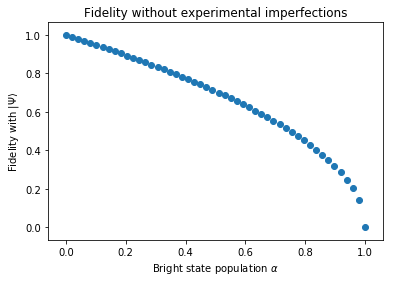

In [141]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

alfas = np.linspace(0,1)
fids = np.zeros_like(alfas)
for i, x in enumerate(alfas):
    updown = qt.tensor(qt.basis(2,1), qt.basis(2,0))
    downup = qt.tensor(qt.basis(2,0), qt.basis(2,1))
    upup = qt.tensor(qt.basis(2,1), qt.basis(2,1))
    psi_ac = (updown + downup).unit()
    rho_ac = (1-x) * qt.ket2dm(psi_ac) + (x) * qt.ket2dm(upup)
    fids[i] = qt.fidelity(rho_ac, qt.ket2dm(psi_ac))
    
plt.title('Fidelity without experimental imperfections')
plt.xlabel(r'Bright state population $\alpha$')
plt.ylabel(r'Fidelity with $|\Psi\rangle$')
plt.scatter(alfas, fids)
plt.show()

At this point the entangled state between A and C can be written as $\rho_{AC} = f(F_{AC}) \ketbra{\Psi_{AC}} + (1-f(F_{AC})) \frac{\hat{\mathbb{I}}}{4}$, where $f(F_{AC})$ is a number s.t. the fidelity of $\rho_{AC}$ with $\ketbra{\Psi_{AC}}$ is $F_{AC}$. For example, if the fidelity is 0.80, then $f(\alpha_1) \approx 0.52$.

In [142]:
f=0.52
downup = qt.tensor(qt.basis(2,0), qt.basis(2,1))
updown = qt.tensor(qt.basis(2,1), qt.basis(2,0))
psi_ac = (updown + downup).unit()
mixed_state = qt.tensor(qt.maximally_mixed_dm(2), qt.maximally_mixed_dm(2))
rho_ac = f * qt.ket2dm(psi_ac) + (1-f) * mixed_state
print('Fidelity with f={} is: {:.2f}'.format(f, qt.fidelity(rho_ac, qt.ket2dm(psi_ac))))

Fidelity with f=0.52 is: 0.80


At this point we perform our SWAP gate. The operation will have some fidelity with the ideal SWAP gate. We can model the final state as swapped with probability $p_{SWAP}$ and a mixed carbon state and init electron state with probability $1 - p_{SWAP}$. In the distillation paper $p_{SWAP} = 0.$